**Analysis of Framingham Heart Study

**Domain :

Healthcare

**Table of Contents:

Information
Loading Dataset
Data Cleansing & EDA
Conclusion
Source (Download On Request) : https://www.nhlbi.nih.gov/science/framingham-heart-study-fhs

**Details : 

The Framingham Heart Study is a long term prospective study of the etiology of cardiovascular disease among a population of free living subjects in the community of Framingham, Massachusetts. The Framingham Heart Study was a landmark study in epidemiology in that it was the first prospective study of cardiovascular disease and identified the concept of risk factors and their joint effects FHS Longitudinal Data Document.

**The Framingham Risk Score

The Framingham Risk Score is a 10-year calculation of risk for cardiovascular disease was formulated from the Framingham Heart Study. The Framingham Risk Score Calculator uses several factors in order to calculate the patient’s risk of developing cardiovascular disease within 10 years. Low intermediate, and high risk is based on the percent risk over 10 years.

Low Risk: <10% risk in the next 10 years
Intermediate Risk: 10-20% risk in the next 10 years
High Risk: >20% risk in the next 10 years

The components of the risk calculator are:
Sex : the gender of the observations. The variable is a binary named “male” in the dataset. 
age : Age at the time of medical examination in years. 
education : A categorical variable of the participants education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4) 
currentSmoker: Current cigarette smoking at the time of examinations 
cigsPerDay: Number of cigarettes smoked each day 
BPmeds: Use of Anti-hypertensive medication at exam 
prevalentStroke: Prevalent Stroke (0 = free of disease) 
prevalentHyp: Prevalent Hypertensive. Subject was defined as hypertensive if treated diabetes: Diabetic according to criteria of first exam treated 
totChol: Total cholesterol (mg/dL) 
sysBP: Systolic Blood Pressure (mmHg) 
diaBP: Diastolic blood pressure (mmHg) 
BMI: Body Mass Index, weight (kg)/height (m)^2 
heartRate: Heart rate (beats/minute) 
glucose: Blood glucose level (mg/dL) 
And finally the response variable : + TenYearCHD : The 10 year risk of coronary heart disease(CHD).

**Questions:

1. What is the spread of each attribute in the given data set ?
2. What are the lifestyle changes seen in people with heart disease?
3. Can we get the count of CHD based on gender?
4. Which characteristics are most prevalent in people have heart disease?
5. Can we group people of certain age together and figure out how Sys. BP and Dia. BP affects by Age group ?
6. How is our variables distributed? Are they imbalanced?
7. What are the weakness of this dataset?


**Objective :

we will look at prevalence of different risk factors, and see which ones are common with development of heart disease.

**Dataset Weakness:

The Framingham Risk Score (FRS) has driven cardiovascular disease risk screening for many years. In general, there are 2 main problems with current dataset. First, this screening happened based on known risk factors and not the actual presence of disease. Second, it is based on epidemiology.
Epidemiologic data can be tricky because it tells us about issues in a given population. However, it does NOT necessarily indicate risk for a specific person.

## Loading Data

In [1]:
#import Libraries
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np 
import pandas as pd
import sklearn
import seaborn as sns
import os
for dirname, _, filenames in os.walk("../output_data/framingham.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# read data farame
df = pd.read_csv("output_data/framingham.csv")
df.head(-1)

,ID,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,2,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,3,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,4,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,5,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,4235,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,4236,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,4237,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,4238,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [3]:
df.describe()

,ID,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.0000,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,2120.5000,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,1224.1269,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,1.0000,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,1060.7500,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,2120.5000,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,3180.2500,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,4240.0000,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               4240 non-null   int64  
 1   male             4240 non-null   int64  
 2   age              4240 non-null   int64  
 3   education        4135 non-null   float64
 4   currentSmoker    4240 non-null   int64  
 5   cigsPerDay       4211 non-null   float64
 6   BPMeds           4187 non-null   float64
 7   prevalentStroke  4240 non-null   int64  
 8   prevalentHyp     4240 non-null   int64  
 9   diabetes         4240 non-null   int64  
 10  totChol          4190 non-null   float64
 11  sysBP            4240 non-null   float64
 12  diaBP            4240 non-null   float64
 13  BMI              4221 non-null   float64
 14  heartRate        4239 non-null   float64
 15  glucose          3852 non-null   float64
 16  TenYearCHD       4240 non-null   int64  
dtypes: float64(9),

## Data Cleansing and EDA

In [3]:
#Cleaning up DataSet
# Check for Duplication
duplicate_df = df[df.duplicated()]
duplicate_df

# checking for missing values
df.isna().sum()
null = df[df.isna().any(axis=1)]
null

# Dropping all rows with missing data
df = df.dropna()
df.isna().sum()
df.columns

#rename columns
df = df.set_index("ID")
df.rename(columns={'male':'Gender', 'age': 'Age','currentSmoker':'Current-Smoker',
                                           'cigsPerDay':'Cigarettes-Per-Day','education':'Education',
                                            'prevalentStroke':'Prevalent-Stroke','prevalentHyp':'Prevalent-Hyp',
                                           'diabetes':'Diabetes','totChol':'Total-Cholesterol',
                                           'sysBP':'Systolic-Blood-Pressure','BPMeds':'Blood-Pressure-Medication','diaBP':'Diastolic-Blood-Pressure',
                                           'heartRate':'Heart-Rate','glucose':'Glucose'},inplace=True)
df["Gender"]= df["Gender"].replace(1, "Male")
df["Gender"]= df["Gender"].replace(0, "Female")
df.head(-1)

,Gender,Age,Education,Current-Smoker,Cigarettes-Per-Day,Blood-Pressure-Medication,Prevalent-Stroke,Prevalent-Hyp,Diabetes,Total-Cholesterol,Systolic-Blood-Pressure,Diastolic-Blood-Pressure,BMI,Heart-Rate,Glucose,TenYearCHD
ID,,,,,,,,,,,,,,,,
1,Male,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
2,Female,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
3,Male,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
4,Female,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
5,Female,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4234,Male,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4235,Male,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [4]:
# Check the data shape by rows vs columns
df.shape

(3658, 16)

In [5]:
# Checking data types and description of all the Parameters after datacleaning step
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 1 to 4240
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     3658 non-null   object 
 1   Age                        3658 non-null   int64  
 2   Education                  3658 non-null   float64
 3   Current-Smoker             3658 non-null   int64  
 4   Cigarettes-Per-Day         3658 non-null   float64
 5   Blood-Pressure-Medication  3658 non-null   float64
 6   Prevalent-Stroke           3658 non-null   int64  
 7   Prevalent-Hyp              3658 non-null   int64  
 8   Diabetes                   3658 non-null   int64  
 9   Total-Cholesterol          3658 non-null   float64
 10  Systolic-Blood-Pressure    3658 non-null   float64
 11  Diastolic-Blood-Pressure   3658 non-null   float64
 12  BMI                        3658 non-null   float64
 13  Heart-Rate                 3658 non-null   float

,Age,Education,Current-Smoker,Cigarettes-Per-Day,Blood-Pressure-Medication,Prevalent-Stroke,Prevalent-Hyp,Diabetes,Total-Cholesterol,Systolic-Blood-Pressure,Diastolic-Blood-Pressure,BMI,Heart-Rate,Glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Observations :
Some the features are Discrete so let us analyze continuous ones

Age : We can see that Min. age of subject found in given records is 32 while Max. being 70. So our values are ranging from 32 to 70.
cigsPerDay : Subject smoking Cig. per day is as low as nill while we have 70 Cigs. per day making the Peak.
totChol : Min. Cholesterol level recorded in our dataset is 113 while Max. is 600.
sysBP : Min. Systolic Blood Pressure observed in Subject is 83 while Max. is 295.
diaBP : Min. Diastolic Blood Pressure observed in Subject is 48 while Max. is 142.
BMI : Body Mass Index in our dataset ranges from 15.54 to 56.
heartRate : Observed Heartrate in our case study is 44 to 143.
glucose : Glucose sugar level range is 40 to 394.

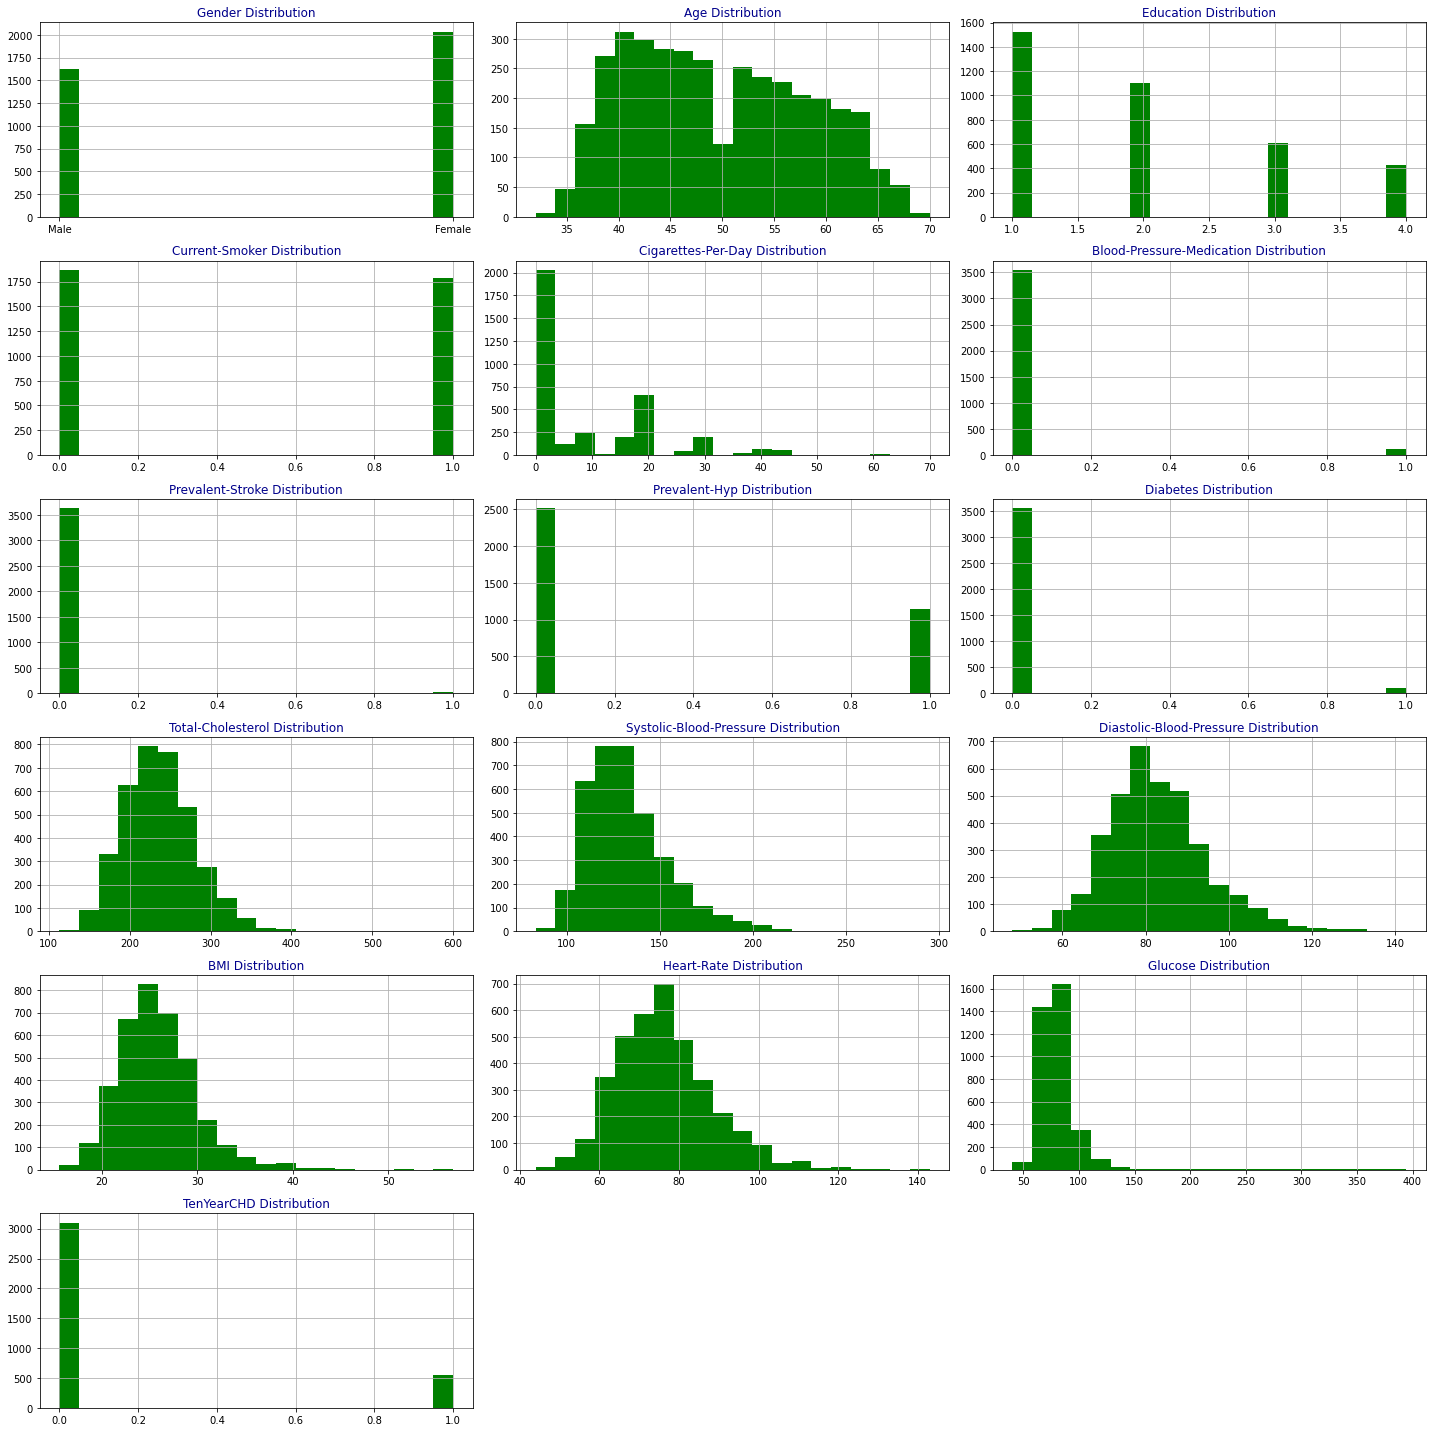

In [6]:
#Exploratory Analysis
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='green')
        ax.set_title(feature+" Distribution",color='DarkBlue')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

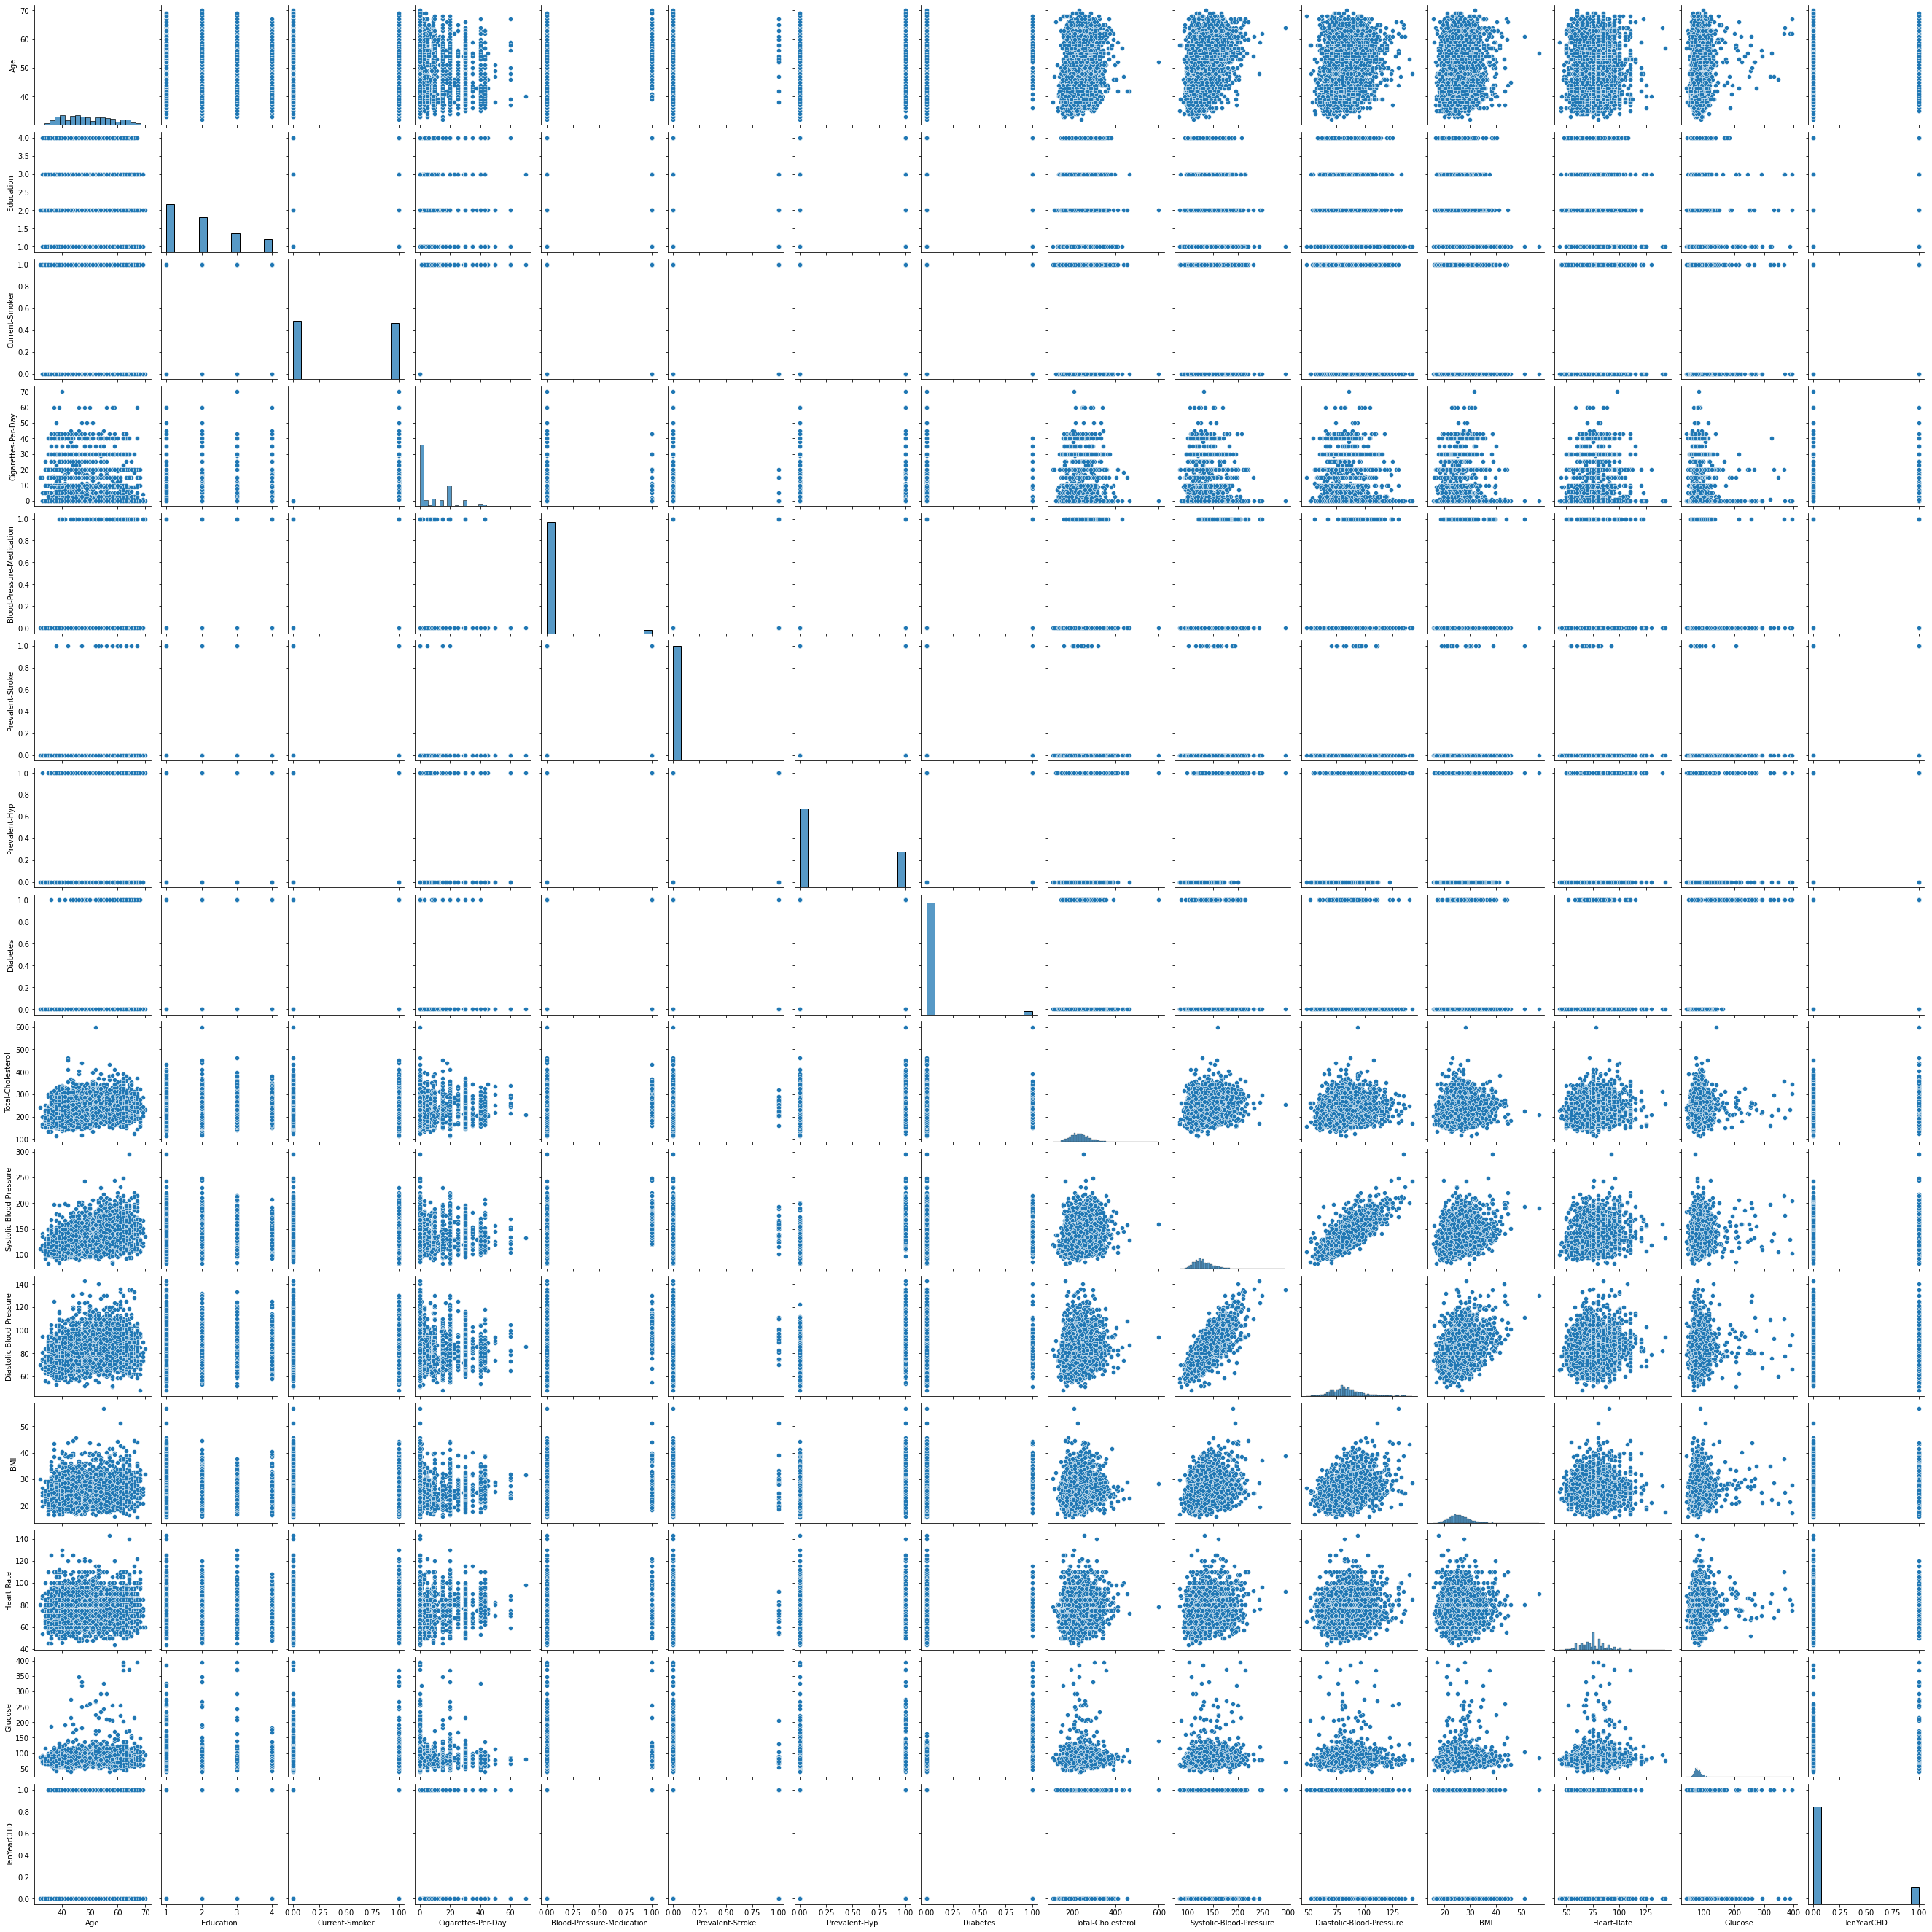

In [7]:
# Checking for outliers
df.describe()
sns.pairplot(df)

In [8]:
# Total number of different genders with CHD
df.TenYearCHD.value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

Text(0.5, 1.0, 'Correlation between different fearures')

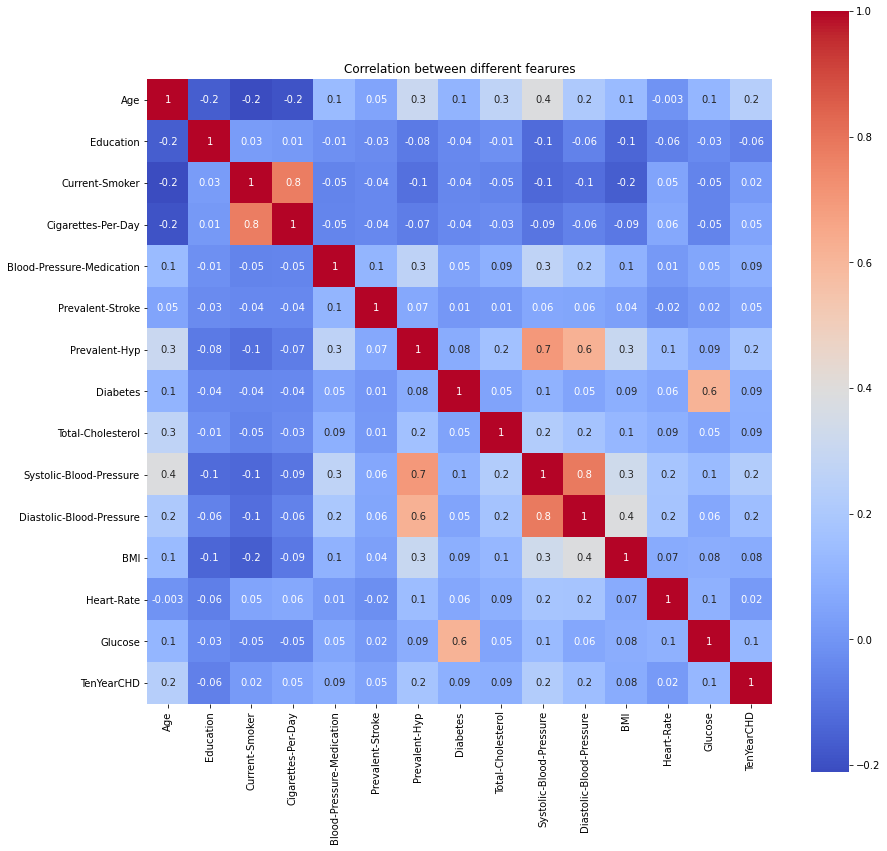

In [9]:
## Checking the Pearson correlation between output and input fields through a heatmap by the help of correlation function
correlation = df.corr()
plt.figure(figsize=(14,14))
g = sns.heatmap(correlation, vmax=1, square=True,cmap='coolwarm',annot= True,xticklabels=True,yticklabels=True, fmt='.1g')
g.set_yticklabels(g.get_yticklabels(), rotation =0)
g.set_xticklabels(g.get_yticklabels(), rotation =90)
plt.title('Correlation between different fearures')

Observations :
Correlation plot gives us valuable information regarding Relation within Attributes. It can Either be Negative or Positive or Niether. We need to always keep 1 feature from 2 Strongly Correlated ones but since we want to perform EDA.
currentSmoker & cigsPerDay has strong Correlation of 0.8 (Scaled for better Observations)
prevalentHyp vs sysBP / diaBP are having Positive Correlation of 0.7 and 0.6.
While, glucose & diabetes are postively Correlated.
sysBP & diaBP are also having Positive Correlation.
Usually we fill Null Values with Measures of Central Tendency (Mean / Median / Mode) or we've techniqus like Forward / Backward fill but in this case we can observe the Correlation plot and consider it to Fill missing values. E.g., We have Positive Correlation between currentSmoker & cigsPerDay, we know that currentSmoker has values either 1 (is a Smoker) or 0 (is not a Smoker), we can groupby currentSmoker and Impute Missing values based on Median. We can do the same for BMI based on male (Gender) & Age.

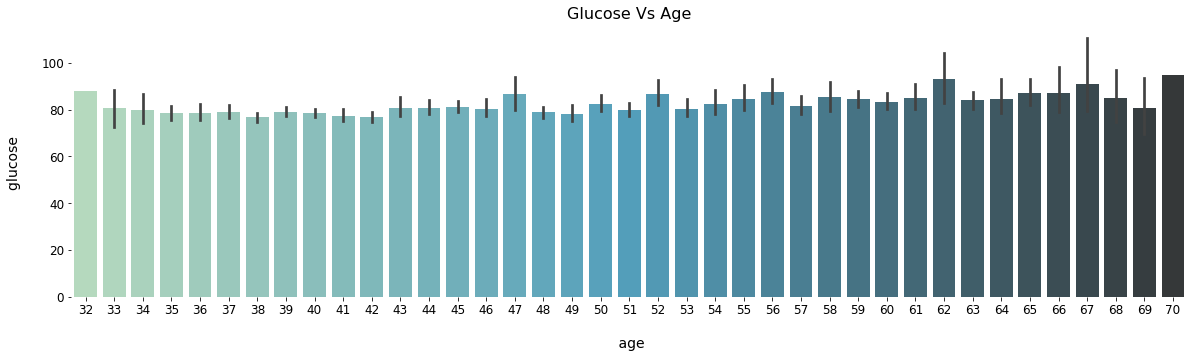

In [10]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x= df['Age'], y= df['Glucose'], data=df, palette = "GnBu_d")
plt.box(False)
plt.title('Glucose Vs Age', fontsize=16)
plt.xlabel('\n age', fontsize=14)
plt.ylabel('glucose \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

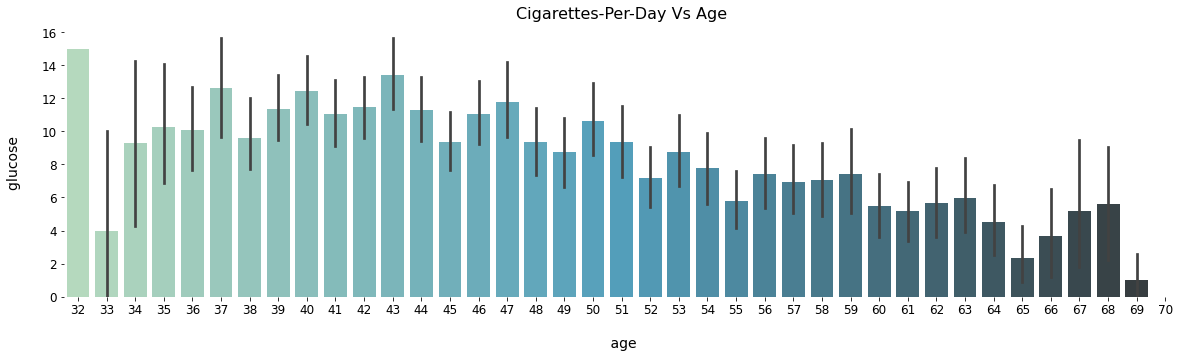

In [11]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x= df['Age'], y= df['Cigarettes-Per-Day'], data=df, palette = "GnBu_d")
plt.box(False)
plt.title('Cigarettes-Per-Day Vs Age', fontsize=16)
plt.xlabel('\n age', fontsize=14)
plt.ylabel('glucose \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

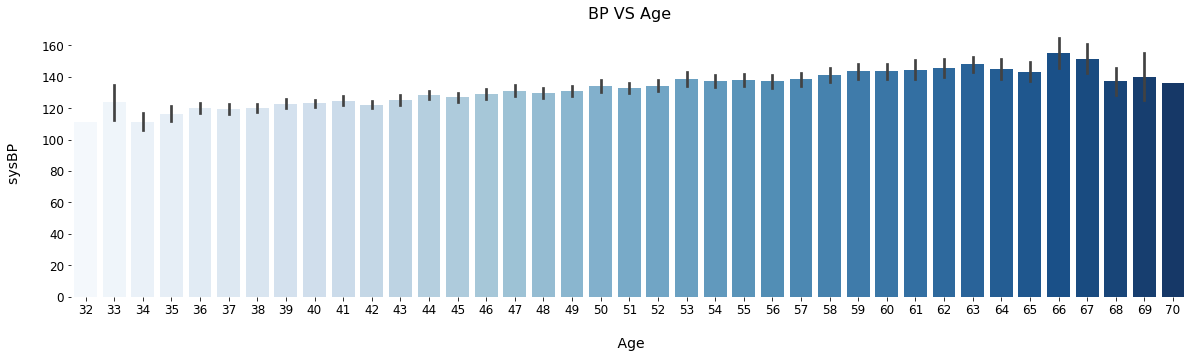

In [12]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x= df['Age'], y= df['Systolic-Blood-Pressure'], data=df, palette = "Blues")
plt.box(False)
plt.title('BP VS Age', fontsize=16)
plt.xlabel('\n Age', fontsize=14)
plt.ylabel('sysBP \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

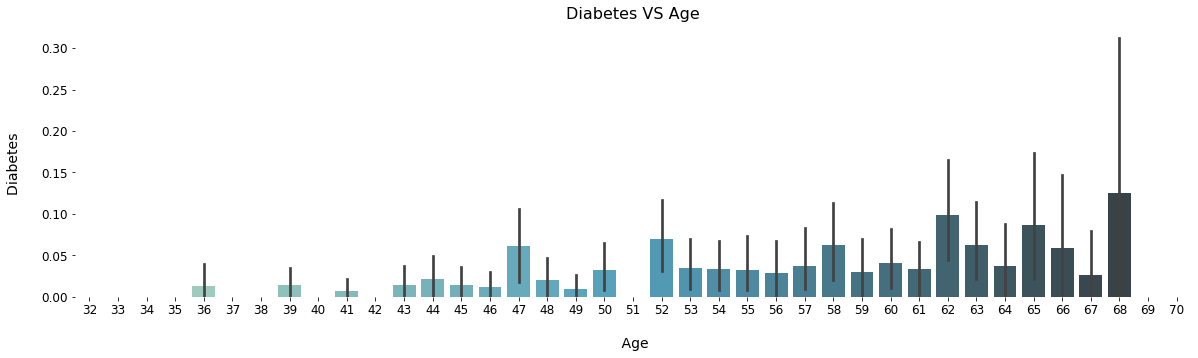

In [13]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x= df['Age'], y= df['Diabetes'], data=df, palette = "GnBu_d")
plt.box(False)
plt.title('Diabetes VS Age', fontsize=16)
plt.xlabel('\n Age', fontsize=14)
plt.ylabel('Diabetes \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

C:\Users\Sajedeh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Gender,Age,Education,Current-Smoker,Cigarettes-Per-Day,Blood-Pressure-Medication,Prevalent-Stroke,Prevalent-Hyp,Diabetes,Total-Cholesterol,Systolic-Blood-Pressure,Diastolic-Blood-Pressure,BMI,Heart-Rate,Glucose,TenYearCHD
ID,,,,,,,,,,,,,,,,
1364,Male,55,1.0,1,40.0,0.0,0,0,1,205.0,127.0,76.0,22.24,90.0,325.0,1
2407,Female,62,1.0,0,0.0,0.0,0,0,1,233.0,130.0,87.0,21.34,85.0,386.0,0
2802,Female,47,1.0,1,1.0,0.0,0,1,1,160.0,197.0,109.0,34.91,82.0,320.0,1
2894,Male,62,3.0,0,0.0,0.0,0,0,1,346.0,102.5,66.5,17.17,80.0,394.0,1
2910,Female,67,2.0,0,0.0,1.0,0,1,1,303.0,204.0,96.0,27.86,75.0,394.0,1
3818,Male,47,2.0,1,20.0,0.0,0,1,1,296.0,141.0,93.0,28.50,68.0,332.0,1
3845,Female,62,3.0,1,20.0,1.0,0,1,1,358.0,215.0,110.0,37.62,110.0,368.0,1
3850,Female,46,2.0,1,15.0,0.0,0,0,1,233.0,106.0,60.0,20.84,75.0,348.0,0
3972,Male,64,3.0,0,0.0,0.0,0,1,1,195.0,176.0,78.0,24.90,95.0,370.0,0


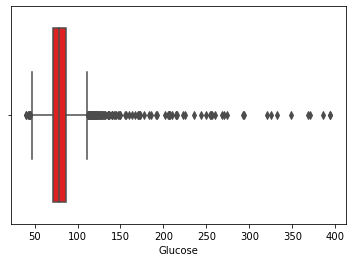

In [14]:
# Check for candidates with Glucose >300 (considered the Glucose factor as an outlier) 
#### note for the group: I uset boxplot!
sns.boxplot(df.Glucose,color='red')
Outlier_sysBP = df[(df['Glucose'] > 300)] 
Outlier_sysBP

C:\Users\Sajedeh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Gender,Age,Education,Current-Smoker,Cigarettes-Per-Day,Blood-Pressure-Medication,Prevalent-Stroke,Prevalent-Hyp,Diabetes,Total-Cholesterol,Systolic-Blood-Pressure,Diastolic-Blood-Pressure,BMI,Heart-Rate,Glucose,TenYearCHD
ID,,,,,,,,,,,,,,,,
482,Female,64,1.0,0,0.0,0.0,0,1,0,253.0,295.0,135.0,38.82,92.0,70.0,1
865,Female,59,2.0,0,0.0,1.0,0,1,0,264.0,244.0,124.0,19.61,76.0,120.0,1
1190,Female,48,1.0,0,0.0,0.0,0,1,0,169.0,243.0,142.5,28.49,85.0,77.0,0
1990,Male,61,1.0,0,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
3490,Female,62,2.0,0,0.0,1.0,0,1,0,298.0,248.0,130.0,37.10,96.0,77.0,1
3617,Female,54,2.0,1,15.0,0.0,0,1,0,262.0,230.0,110.0,24.76,93.0,97.0,0


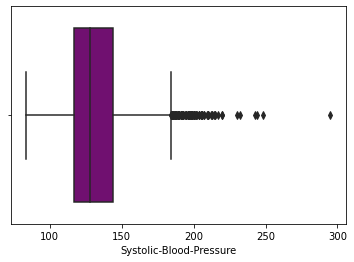

In [15]:
# Look for candidates with sysBP higher than 220 (BP>220 is considered as an outlier)
sns.boxplot(df['Systolic-Blood-Pressure'],color='purple')
Outlier_sysBP = df[(df['Systolic-Blood-Pressure'] > 220)] 
Outlier_sysBP

C:\Users\Sajedeh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


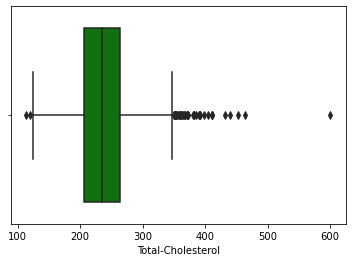

In [16]:
## Checking total cholestrol greater than 500 (cholestrol is considering as an outlier)
sns.boxplot(df['Total-Cholesterol'],color='green')
Outlier_totChol = df[(df['Total-Cholesterol'] > 500)] 

C:\Users\Sajedeh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Gender,Age,Education,Current-Smoker,Cigarettes-Per-Day,Blood-Pressure-Medication,Prevalent-Stroke,Prevalent-Hyp,Diabetes,Total-Cholesterol,Systolic-Blood-Pressure,Diastolic-Blood-Pressure,BMI,Heart-Rate,Glucose,TenYearCHD
ID,,,,,,,,,,,,,,,,
36,Male,37,2.0,0,0.0,0.0,0,1,0,225.0,124.5,92.5,38.53,95.0,83.0,0
38,Male,52,1.0,0,0.0,0.0,0,1,1,178.0,160.0,98.0,40.11,75.0,225.0,0
79,Female,45,1.0,0,0.0,0.0,0,1,0,183.0,151.0,101.0,45.80,80.0,63.0,0
88,Female,61,2.0,1,1.0,0.0,0,1,0,326.0,200.0,104.0,38.46,57.0,78.0,0
109,Female,66,1.0,0,0.0,0.0,0,1,0,278.0,187.0,88.0,40.52,90.0,84.0,1


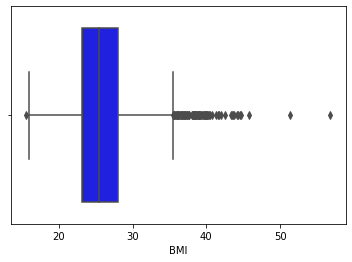

In [17]:
# Check for BMI >35 (BMI > 35 considered extremly obese that is a risk factor with heart problems)
sns.boxplot(df.BMI,color='blue')
Outlier_BMI = df[(df['BMI'] > 35)] 
Outlier_BMI.head()

C:\Users\Sajedeh\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'CHD by Gender')

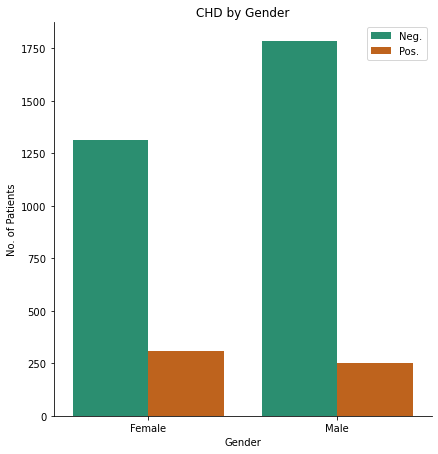

In [18]:
#CHD by Gender Viz.

sns.catplot(x='Gender', hue='TenYearCHD', data=df, kind='count', palette='Dark2', size=6, legend=False)
plt.xlabel('Gender')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('CHD by Gender')

Observations :

Above Bivariate Analysis plot depicts Gender wise absence / presence of Chronic Heart Disease (CHD).
Observations tells us that we've Excessive number of people who are not suffering from CHD.
Negative : Approx. 90% of Males are falling in Negative Category while Approx. 60 to 70% of Females are in Negative Slot.
Positive : While Approx. 10 to 15% of Females & Males are suffering from CHD.
By this we can say that our Dataset is Imbalanced where Approx. 80 to 90% are Negative Classifications and Approx. 10 to 15% are Positive Classes.

C:\Users\Sajedeh\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Number of Diabetes by Gender')

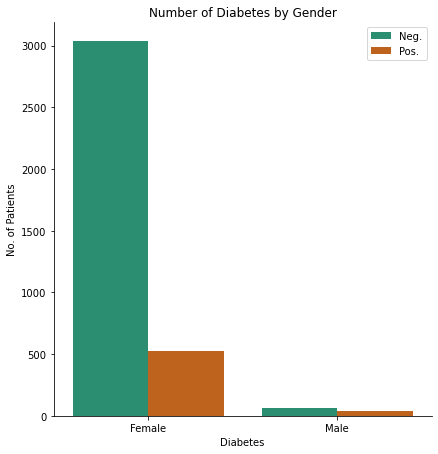

In [19]:
#Diabetes Vs Gender Viz.

sns.catplot(x='Diabetes', hue='TenYearCHD', data=df, kind='count', palette='Dark2', size=6, legend=False)
plt.xlabel('Diabetes')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('Number of Diabetes by Gender')

C:\Users\Sajedeh\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Current-Smoker by Gender')

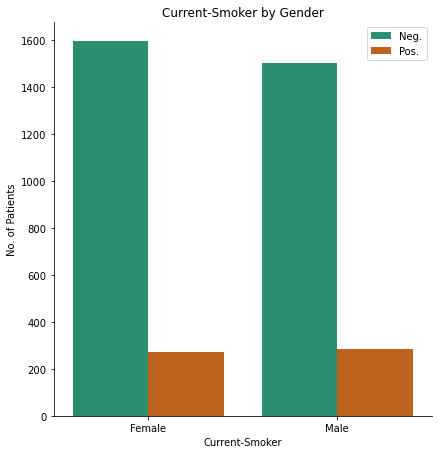

In [20]:
#Diabetes Vs Gender Viz.

sns.catplot(x='Current-Smoker', hue='TenYearCHD', data=df, kind='count', palette='Dark2', size=6, legend=False)
plt.xlabel('Current-Smoker')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('Current-Smoker by Gender')

In [5]:
df['Age'].mean()

KeyError: 'Age'

C:\Users\Sajedeh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Agewise distribution of the patients')

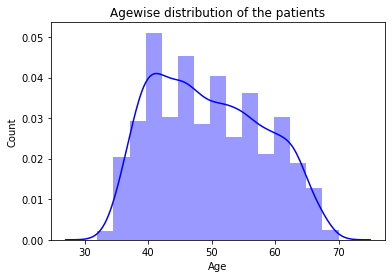

In [21]:
sns.distplot(df['Age'], bins=15, kde=True, color='blue')
plt.ylabel('Count')
plt.title('Agewise distribution of the patients')

Observation :

Subjects ranging from Age 40 to 50 are in Majority followed by 50 to 70.
now, we need to define a user-defined Function to encode Age.

In [22]:

#Age encoding
def encode_age(data):
    if data <= 40:
        return 0
    if data > 40 and data <=55:
        return 1
    else:
        return 2    

#heart rate encoder
def heartrate_enc(data):
    if data <= 60:
        return 0
    if data > 60 and data <=100:
        return 1
    else:
        return 2

#applying functions
df['enc_hr'] = df['Heart-Rate'].apply(heartrate_enc)
df['encode_age'] = df['Age'].apply(lambda x : encode_age(x))

Above Functions will Encode Age and Heart Rate.
We can encode the Age Group Further :
Subject with Age <= 40 are Adults.
Subject with Age > 40 and <= 55 are Middle-Aged Adult.
Subject Above 55 will fall in Senior Category.
We'll Encode HeartRate as follows:
HeartRate <= 60 is Low / Resting HeartBeat.
HeartRate between 60 to 100 is considered as Normal.
While, HeartRate above 100 is High.

C:\Users\Sajedeh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sajedeh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count by Age Group')

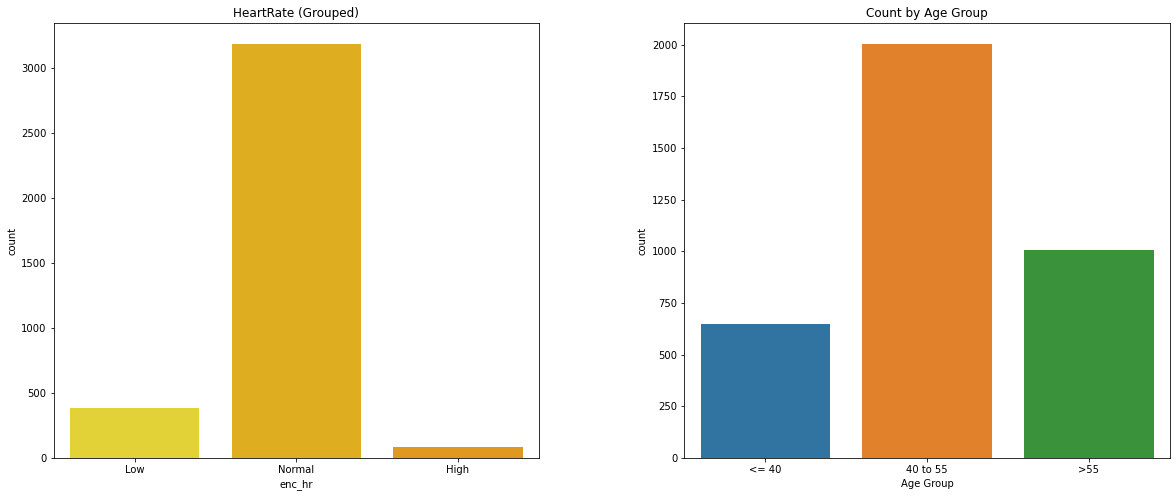

In [23]:
#HeartRate (Grouped) Count

plt.figure(figsize=(20,8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(1, 2, 1)
sns.countplot(df['enc_hr'], palette='Wistia')
plt.title('HeartRate (Grouped)')
plt.xticks([0,1,2], ['Low', 'Normal', 'High'])

plt.subplot(1, 2, 2)
sns.countplot(df['encode_age'])
plt.xlabel('Age Group')
plt.xticks(ticks=[0,1,2], labels=['<= 40', '40 to 55', '>55'])
plt.title('Count by Age Group')

C:\Users\Sajedeh\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Education by Age Group')

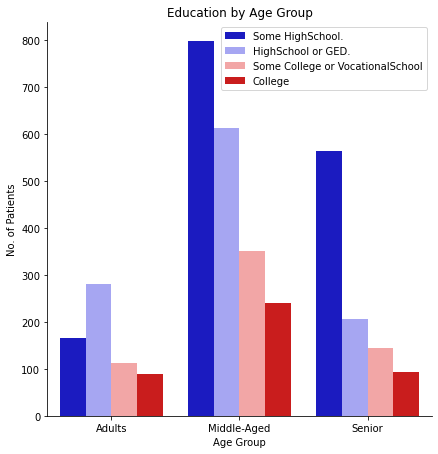

In [27]:
#Education by Age Group

sns.catplot(x='encode_age', hue='Education', data=df, kind='count', palette='seismic', size=6, legend=False)
plt.xlabel('Age Group')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.ylabel('No. of Patients')
plt.legend(['Some HighSchool.', 'HighSchool or GED.', 'Some College or VocationalSchool', 'College'])
plt.title('Education by Age Group')

C:\Users\Sajedeh\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Diabetes by Age Group')

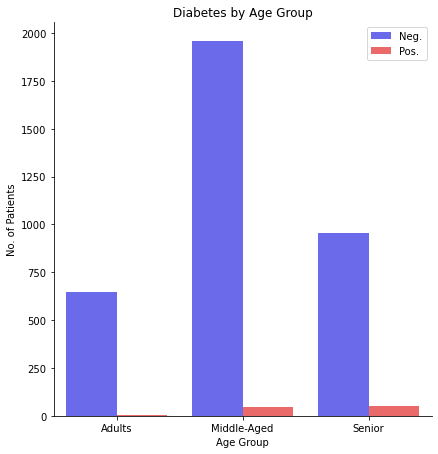

In [29]:
#Diabetes by Age Group

sns.catplot(x='encode_age', hue='Diabetes', data=df, kind='count', palette='seismic', size=6, legend=False)
plt.xlabel('Age Group')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('Diabetes by Age Group')

We can observe that Subject with Normal HeartRate are in Majority followed by Resting / Low HeartRate and High HeartRate.
We've more number of Middle-Aged Adults in our Dataset followed by Seniors And then Adults.

C:\Users\Sajedeh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sajedeh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sajedeh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

Text(0.5, 1.0, 'Distribution of HeartRate')

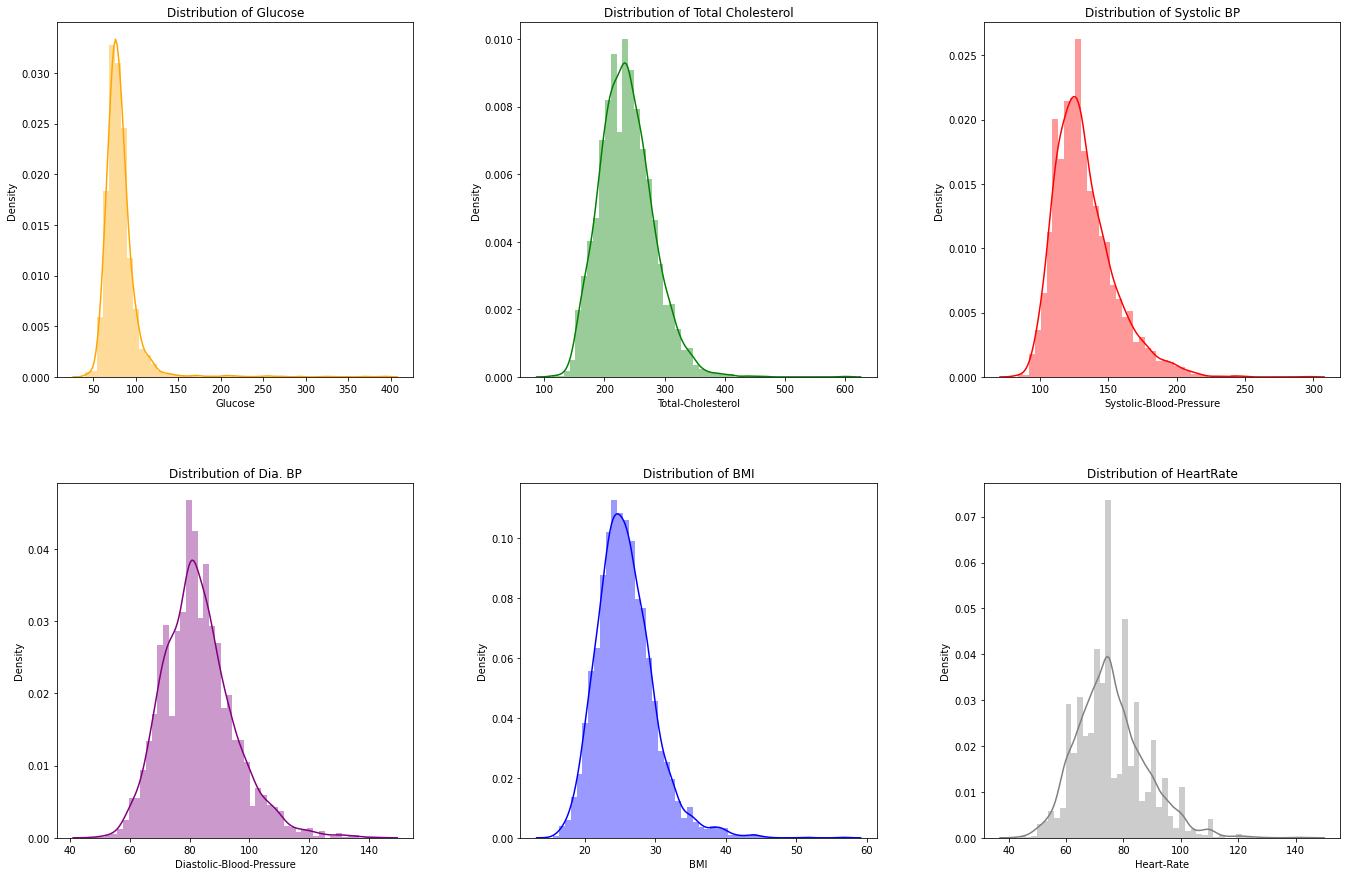

In [25]:
#Distribution of Continuous variables

plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.distplot(df['Glucose'] , color='orange')
plt.title('Distribution of Glucose')

plt.subplot(2, 3, 2)
sns.distplot(df['Total-Cholesterol'], color='g')
plt.title('Distribution of Total Cholesterol')

plt.subplot(2, 3, 3)
sns.distplot(df['Systolic-Blood-Pressure'], color='r')
plt.title('Distribution of Systolic BP')

plt.subplot(2, 3, 4)
sns.distplot(df['Diastolic-Blood-Pressure'] , color='purple')
plt.title('Distribution of Dia. BP')

plt.subplot(2, 3, 5)
sns.distplot(df['BMI'], color='blue')
plt.title('Distribution of BMI')

plt.subplot(2, 3, 6)
sns.distplot(df['Heart-Rate'], color='grey')
plt.title('Distribution of HeartRate')

Observations :

We can see Glucose, Total Cholesterol, Systolic BP & BMI is Right Skewed.
While Diastolic BP & Heart Rate are close to Normal / Gaussian Distribution.

Text(0.5, 1.0, 'Target Class Count')

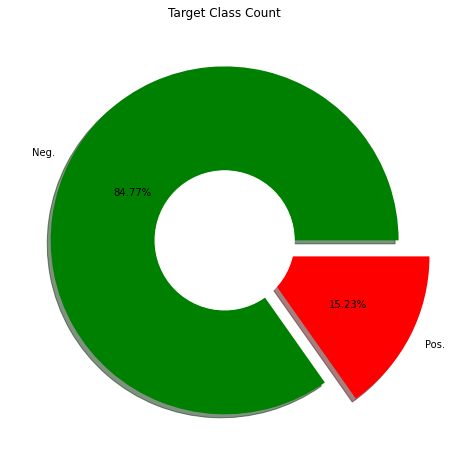

In [26]:
# In this Dataset we can see the ratio of 85:15(# of Neg:Pos)that displays the Positive paitients are Minor part of this dataset

plt.figure(figsize=(8,8))
plt.pie(df['TenYearCHD'].value_counts(), labels=['Neg.','Pos.'], autopct='%1.2f%%', explode=[0,0.2], shadow=True, colors=['green','red'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

Observations :
We can see that we've Imbalanced Dataset here having ratio of 85:15 where Positive Class is Minor.